# Chapter2 准备工作

## 基础操作

In [1]:
import torch

In [2]:
x = torch.arange(12)#创建一个长度为12的一维数组
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape #检查大小

torch.Size([12])

In [4]:
x.numel()#元素数量

12

In [5]:
#我们现在需要改变一下形状
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以看到原来的数组没有被改变

In [7]:
#我们还可以创建一个全零和全一的张量,
#以及一个标准正态分布下的随机采样生成的张量
Y = torch.zeros(3,4)
Z = torch.ones(3,4)
F = torch.randn(3,4)
print(Y,'\n', Z,'\n', F)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 
 tensor([[ 0.8363, -0.4029,  0.9437, -2.1659],
        [ 0.5113,  1.6741,  1.3242, -0.5600],
        [-0.5174,  0.4735,  1.0836, -0.5379]])


对应的我们张量也有四则运算（逐元素）

In [8]:
X = torch.randint(1,10,(2,2))
Y = torch.randint(5,20,(2,2))
X+Y, X-Y, X*Y, X/Y, X**Y

(tensor([[16, 13],
         [11, 17]]),
 tensor([[-2, -1],
         [-1, -7]]),
 tensor([[63, 42],
         [30, 60]]),
 tensor([[0.7778, 0.8571],
         [0.8333, 0.4167]]),
 tensor([[ 40353607,    279936],
         [    15625, 244140625]]))

In [9]:
#连接操作
X = torch.randint(1,10,(2,2))
Y = torch.randint(5,20,(2,2))
torch.cat((X, Y), dim = 0), torch.cat((X, Y), dim = 1), X.sum(), Y.sum()

(tensor([[ 9,  4],
         [ 8,  4],
         [18,  5],
         [13, 17]]),
 tensor([[ 9,  4, 18,  5],
         [ 8,  4, 13, 17]]),
 tensor(25),
 tensor(53))

In [10]:
X == Y #逻辑运算

tensor([[False, False],
        [False, False]])

## 索引和切片

In [11]:
X = torch.randint(1,5,(2, 3, 3))
X

tensor([[[4, 3, 3],
         [3, 3, 3],
         [2, 1, 1]],

        [[2, 3, 4],
         [1, 1, 2],
         [3, 3, 4]]])

In [12]:
# slices-切片(前向、水平，侧向 )
print(X[0, :, :],'\n', X[:, 0, :],'\n', X[:, :, 0])

tensor([[4, 3, 3],
        [3, 3, 3],
        [2, 1, 1]]) 
 tensor([[4, 3, 3],
        [2, 3, 4]]) 
 tensor([[4, 3, 2],
        [2, 1, 3]])


In [13]:
# 也可以小区域
X[0,1:3,0:2]

tensor([[3, 3],
        [2, 1]])

## 转化为其他的python对象

In [14]:
# torch和numpy相互转换
A = X.numpy()
B =torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [15]:
X = torch.tensor(12)
print(X, X.item(), float(X), int(X))

# 对于高维张量我们可以先变为一维在存储到list里面
M = torch.randint(1,10,(2,2,3))
m = M.reshape(-1) # -1表示自动计算维度
tensor_list = m.tolist()
print(M, tensor_list)

tensor(12) 12 12.0 12
tensor([[[1, 4, 2],
         [6, 6, 7]],

        [[9, 8, 4],
         [5, 9, 4]]]) [1, 4, 2, 6, 6, 7, 9, 8, 4, 5, 9, 4]


### 张量的直和与Hadamard积

In [16]:
x = torch.arange(24, dtype = torch.float64).reshape(2, 4, 3)
print(x)
y = x.clone() #通过分配新内存，把x的副本分配给y
print('x+y结果为：\n', x+y, '\nx*y结果为：\n', x*y) #可以看到结果为对应位置元素进行+和*

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.]],

        [[12., 13., 14.],
         [15., 16., 17.],
         [18., 19., 20.],
         [21., 22., 23.]]], dtype=torch.float64)
x+y结果为：
 tensor([[[ 0.,  2.,  4.],
         [ 6.,  8., 10.],
         [12., 14., 16.],
         [18., 20., 22.]],

        [[24., 26., 28.],
         [30., 32., 34.],
         [36., 38., 40.],
         [42., 44., 46.]]], dtype=torch.float64) 
x*y结果为：
 tensor([[[  0.,   1.,   4.],
         [  9.,  16.,  25.],
         [ 36.,  49.,  64.],
         [ 81., 100., 121.]],

        [[144., 169., 196.],
         [225., 256., 289.],
         [324., 361., 400.],
         [441., 484., 529.]]], dtype=torch.float64)


同样的对于标量运算，乘上或者加上都不会改变张量的形状，其结果为  
每个元素加上或乘上标量。

## 降维

对于高阶张量，降维的方法可以分为求和、沿着某个轴或者多个轴生成输出向量。

In [17]:
# 生成向量
X = torch.arange(24, dtype = torch.float32).reshape(2,3,4)
X

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]])

In [18]:
# 求和
X.sum()

tensor(276.)

另一种求和相关的为求平均值mean/average

In [19]:
print(X.mean(), X.sum()/X.numel())
Y = X.sum(axis=0)/X.shape[0]
print(X.mean(axis=0).mean(axis=1), Y, Y.sum(axis=1)/Y.shape[1])

tensor(11.5000) tensor(11.5000)
tensor([ 7.5000, 11.5000, 15.5000]) tensor([[ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.]]) tensor([ 7.5000, 11.5000, 15.5000])


In [20]:
# 生成向量
X_sum_ax01 = X.sum(axis=0).sum(axis=1) #沿着行和通道降维
X_sum_ax01, X_sum_ax01.shape

(tensor([ 60.,  92., 124.]), torch.Size([3]))

对应的有另外三种沿着对应的两个axis降维的方法

另外，在计算和或均值时保持轴数不变会很有用。

In [21]:
sum_X = X.sum(axis=0, keepdims=True).sum(axis=2, keepdims=True)
sum_X

tensor([[[ 60.],
         [ 92.],
         [124.]]])

In [22]:
X/sum_X #这样就可以通过广播机制做除法

tensor([[[0.0000, 0.0167, 0.0333, 0.0500],
         [0.0435, 0.0543, 0.0652, 0.0761],
         [0.0645, 0.0726, 0.0806, 0.0887]],

        [[0.2000, 0.2167, 0.2333, 0.2500],
         [0.1739, 0.1848, 0.1957, 0.2065],
         [0.1613, 0.1694, 0.1774, 0.1855]]])

In [23]:
print(X.cumsum(axis=0), '\n', X.cumsum(axis=1)) #向着某一个轴累加

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 14., 16., 18.],
         [20., 22., 24., 26.],
         [28., 30., 32., 34.]]]) 
 tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.]],

        [[12., 13., 14., 15.],
         [28., 30., 32., 34.],
         [48., 51., 54., 57.]]])


## 点积（Dot product）

给定两个向量$\mathbf{x},\mathbf{y}$，它们的点积$\mathbf{x}^{T}\mathbf{y}=\sum_{i}{x_iy_i}$也就是逐元素相乘  
点积有很多应用，例如向量的加权和就能概括为点积的形式：$\mathbf{x}^{T}\mathbf{w}$  
其中w为权重向量。

In [24]:
x = torch.arange(4, dtype = torch.float32)
y = torch.ones(4,dtype = torch.float32)
print(x, y, torch.dot(x, y))

tensor([0., 1., 2., 3.]) tensor([1., 1., 1., 1.]) tensor(6.)


In [25]:
# 其实以上就等价为逐元素乘法后求和
torch.sum(x*y)

tensor(6.)

## 矩阵范数相关

In [26]:
# 矩阵-向量和矩阵-矩阵乘法
A = torch.arange(20, dtype = torch.float32).reshape(5, 4)
x = torch.ones(4, dtype = torch.float32)
A.shape, x.shape, torch.mv(A, x) #maxtric-vector

(torch.Size([5, 4]), torch.Size([4]), tensor([ 6., 22., 38., 54., 70.]))

In [27]:
B = torch.arange(20, dtype = torch.float32).reshape(4, 5)
torch.mm(A, B) ##maxtric-maxtric

tensor([[ 70.,  76.,  82.,  88.,  94.],
        [190., 212., 234., 256., 278.],
        [310., 348., 386., 424., 462.],
        [430., 484., 538., 592., 646.],
        [550., 620., 690., 760., 830.]])

我们熟知的欧几里得距离$L_2$范数，$$ \|x\|_2 = \sqrt{\sum_i^n{x_i^2}}$$通常我们省略范数的下标2，记为$\|x\|$

In [28]:
# L2范数
u = torch.tensor([3., -4.])
torch.norm(u)

tensor(5.)

也会经常遇到L1范数：$$\|x\|_1 = \sum_i^n{\mid x_i\mid} $$

In [29]:
torch.abs(u).sum()

tensor(7.)

矩阵的F-范数也即矩阵元素的平方和：
$$\|X\|_F = \sqrt{\sum_i^m \sum_j^n x_{ij}^2 }$$

In [30]:
torch.norm(torch.ones(4, 9))

tensor(6.)

## 自动微分

我们想对函数$y = 2x^Tx$关于向量x求导

In [31]:
# 首先我们创建初始值
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [32]:
#求梯度之前，我们需要一个地方来存储。
x.requires_grad_(True)
x.grad
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [33]:
# 接下来调用反向传播函数自动计算每个分量的梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [34]:
x.grad == 4*x

tensor([True, True, True, True])

现在我们在计算另一个函数，注意需要把梯度清零（因为pytorch的梯度是累计的）

In [35]:
x.grad.zero_() #清零
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 非标量变量的反向传播
在大多数情况下，损失函数为标量。在实际应用中我们通常只关心梯度的值，而不关心具体的梯度方向。  
因此，传递一个 1 的梯度可以简化计算，因为我们不需要知道具体的梯度方向，只需要知道梯度的大小。

In [36]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
y.sum().backward()# 等价于y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

## 分离计算

我们想象一种情况，计算z关于x的梯度，但是出于某种原因，我们希望把y作为一个常数  
并且只考虑x在y计算出来之后发挥的作用。

In [37]:
x.grad.zero_()
y = x * x
u = y.detach() # 使得u和x无关
z = u * x 

z.sum().backward()
print(x, x.grad == u)

tensor([0., 1., 2., 3.], requires_grad=True) tensor([True, True, True, True])


## 掷色子
我们可以通过以下例子在验证大数定律。

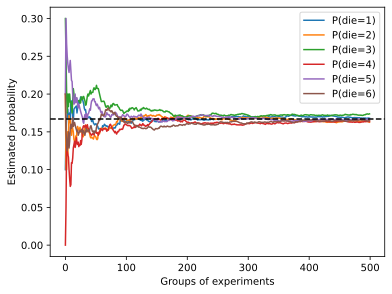

In [38]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones(6) / 6 #创建单个样本的概率分布

counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

# 关于GPU测试

In [41]:
!nvidia-smi

Sun Jul 27 23:38:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.57                 Driver Version: 576.57         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0             10W /  139W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [40]:
torch.cuda.device_count()

1